# 1 Dataset

The ***cars*** dataset consists of three types of entities:

*   the specification of an auto in terms of various characteristics
*   its assigned insurance risk rating
*   its normalized losses in use as compared to other cars

The price of the cars can be predicted using the *'price'* attribute which makes it the target column.

**Data Cleaning:**

The dataset has been cleaned by ,  and  changing the data type of the attributes to float and performing minimum-maximum normalization.

*   removed 10 attributes of discrete values and considering only 15 attributes of continuous values as discrete values provides limited options for analysis, with low sensitivity outcomes and little indication of sources of variation whereas continuous values provides variety of analysis options that can offer high sensitivity outcomes and insight into the sources of variation
*   replaced the NaN (not a number) values with the mean value of the respective attribute as any calculations you perform with NaN will also result in NaN
*   the data type of the attributes were a mix of object, float and integer data types which were all changed to float as we might have to reference a variable of another data type
*   performed minimum-maximum normalization as each attribute has a different scaling which might lead the algorithm to skew unfairly

The cleaned dataset is ***numeric_cars***.

# 2 Goal
To apply various regression models to find the best feature for the prediction of car prices.

# 3 Import Data

Upload ***numeric_cars***.

In [1]:
from google.colab import files
uploaded = files.upload()

Read ***numeric_cars*** which has 15 attributes including the target column *'price'* with values in 201 rows.

In [0]:
import pandas as pd
numeric_cars = pd.read_csv('numeric_cars.csv')
print(numeric_cars.shape)
numeric_cars.head()

(201, 15)


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# 4 Univariate Model using KNeighborsRegressor with Different k Values

Since we are predicting the price of cars, we should use KNeighborsRegressor rather than KNeighborsClassifier. KNeighborsRegressor calculates the average of *'price'* of the K nearest neighbors and predicts the price of the cars based on a similarity measure.

The train_test_split function is used to randomise the order of rows and split the data into training set (80%) and test set (20%) with the random seed as 1.

We are first going to train an univariate model using different k values [1,3,5,7,9] on each attribute except price and return RMSE values.

In [0]:
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


uni_train_cols = numeric_cars.columns.drop('price')
uni_X = numeric_cars[uni_train_cols]
uni_y = numeric_cars['price']
uni_results = pd.DataFrame(columns=uni_train_cols,index=[1]).apply(pd.to_numeric, downcast = 'float', errors = 'coerce')
uni_k = [1,3,5,7,9]

X_train, X_test, y_train, y_test = train_test_split(uni_X, uni_y, test_size=0.2, random_state=1)

for a,b in zip(uni_k,[1,3,5,7,9]): 
    for c in uni_X:
      uni_knn = KNeighborsRegressor(n_neighbors = a)
      uni_knn.fit(X_train[[c]], y_train)
      uni_forecasts = uni_knn.predict(X_test[[c]])
      uni_results.loc[b,c] = np.sqrt(mean_squared_error(y_test, uni_forecasts))

uni_results

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,8995.791016,3645.964111,4263.596191,2693.358398,7240.737793,4653.181641,3714.054199,11903.649414,6789.369629,8655.749023,3337.032959,6134.101074,3554.467285,4560.978516
3,7008.967773,4484.303223,4373.672852,3068.624023,7370.770996,3605.752686,3231.245117,8203.991211,5775.936523,6153.628418,2978.272461,5906.222168,3771.467773,3422.217529
5,6570.666016,5209.889160,3687.155273,3368.170410,6958.143555,3275.684814,3493.454590,6430.078613,6045.586914,7105.987793,3251.119873,6208.025391,3653.003174,4009.907959
7,7106.173828,4815.355957,3576.515137,3290.776367,6780.743164,3052.864258,3669.303223,6090.463867,6294.665527,6726.953613,3460.076904,6866.413086,3650.563965,3572.818115
9,6925.544922,4837.831055,3729.111328,3059.163086,6613.911133,2756.462158,3765.034668,6138.958008,6429.513672,6288.721680,3853.359131,7234.637695,3753.346680,3462.182373


A figure is plotted with the x-axis representing the different k values in KNeighborsRegressor and y-axis representing RMSE values on test set.

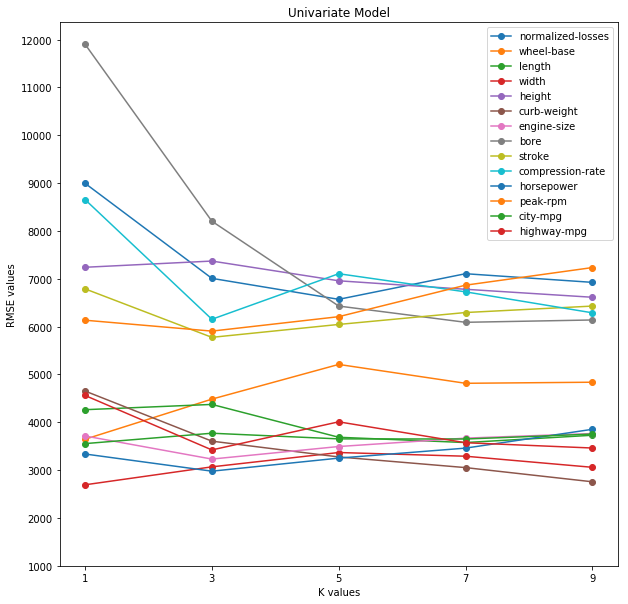

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(uni_results, marker='o')
plt.title('Univariate Model')
plt.xlabel('K values')
plt.ylabel('RMSE values')
plt.xticks(list(range(1, 10, 2)))
plt.yticks(list(range(1000, 13000, 1000)))
plt.legend(['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg'])

Each line in the plot corresponds to a feature. The plot shows 2 groups of lines and the second group at the bottom seems to have the best features as they have lower RMSE values.

The average RMSE across different `k` values for each feature is computed and the top most features are considered to be the best features as they have lower average RMSE values.

In [0]:
avg_uni_results = uni_results.mean().sort_values()
avg_uni_results

width                3096.018311
horsepower           3375.972168
curb-weight          3468.789062
engine-size          3574.618408
city-mpg             3676.569580
highway-mpg          3805.621094
length               3926.010254
wheel-base           4598.668945
stroke               6267.014648
peak-rpm             6469.879883
compression-rate     6986.208008
height               6992.860840
normalized-losses    7321.428711
bore                 7753.428223
dtype: float32

# 5 Multivariate Model using KNeighborsRegressor with Fixed k Value

Lets now fit a KNN model using fixed k value (k=5) on the two best features, three best features, four best features, five best features, six best features separately.

In [0]:
#two best features

two_fixed_X = numeric_cars[['width','horsepower']]
two_fixed_y = numeric_cars[['price']]
two_fixed_best_features = {}
two_fixed_k = [5]

X_train, X_test, y_train, y_test = train_test_split(two_fixed_X, two_fixed_y, test_size=0.2, random_state=1)

for p in two_fixed_k: 
    for q in two_fixed_X:
        two_fixed_knn = KNeighborsRegressor(n_neighbors = p)
        two_fixed_knn.fit(X_train[[q]], y_train)
        two_fixed_forecasts = two_fixed_knn.predict(X_test[[q]])
        two_fixed_best_features[p] = np.sqrt(mean_squared_error(y_test, two_fixed_forecasts))

#end

#three best features

three_fixed_X = numeric_cars[['width','horsepower','curb-weight']]
three_fixed_y = numeric_cars[['price']]
three_fixed_best_features = {}
three_fixed_k = [5]

X_train, X_test, y_train, y_test = train_test_split(three_fixed_X, three_fixed_y, test_size=0.2, random_state=1)

for p in three_fixed_k: 
    for q in three_fixed_X:
        three_fixed_knn = KNeighborsRegressor(n_neighbors = p)
        three_fixed_knn.fit(X_train[[q]], y_train)
        three_fixed_forecasts = three_fixed_knn.predict(X_test[[q]])
        three_fixed_best_features[p] = np.sqrt(mean_squared_error(y_test, three_fixed_forecasts))

#end

#four best features

four_fixed_X = numeric_cars[['width','horsepower','curb-weight','engine-size']]
four_fixed_y = numeric_cars[['price']]
four_fixed_best_features = {}
four_fixed_k = [5]

X_train, X_test, y_train, y_test = train_test_split(four_fixed_X, four_fixed_y, test_size=0.2, random_state=1)

for p in four_fixed_k: 
    for q in four_fixed_X:
        four_fixed_knn = KNeighborsRegressor(n_neighbors = p)
        four_fixed_knn.fit(X_train[[q]], y_train)
        four_fixed_forecasts = four_fixed_knn.predict(X_test[[q]])
        four_fixed_best_features[p] = np.sqrt(mean_squared_error(y_test, four_fixed_forecasts))
      
#end

#five best features

five_fixed_X = numeric_cars[['width','horsepower','curb-weight','engine-size','city-mpg']]
five_fixed_y = numeric_cars[['price']]
five_fixed_best_features = {}
five_fixed_k = [5]

X_train, X_test, y_train, y_test = train_test_split(five_fixed_X, five_fixed_y, test_size=0.2, random_state=1)

for p in five_fixed_k: 
    for q in five_fixed_X:
        five_fixed_knn = KNeighborsRegressor(n_neighbors = p)
        five_fixed_knn.fit(X_train[[q]], y_train)
        five_fixed_forecasts = five_fixed_knn.predict(X_test[[q]])
        five_fixed_best_features[p] = np.sqrt(mean_squared_error(y_test, five_fixed_forecasts))

#end

#six best features

six_fixed_X = numeric_cars[['width','horsepower','curb-weight','engine-size','city-mpg','highway-mpg']]
six_fixed_y = numeric_cars[['price']]
six_fixed_best_features = {}
six_fixed_k = [5]

X_train, X_test, y_train, y_test = train_test_split(six_fixed_X, six_fixed_y, test_size=0.2, random_state=1)

for p in six_fixed_k: 
    for q in six_fixed_X:
        six_fixed_knn = KNeighborsRegressor(n_neighbors = p)
        six_fixed_knn.fit(X_train[[q]], y_train)
        six_fixed_forecasts = six_fixed_knn.predict(X_test[[q]])
        six_fixed_best_features[p] = np.sqrt(mean_squared_error(y_test, six_fixed_forecasts))

#end

In [0]:
from collections import OrderedDict

fixed_features = {"two_fixed_best_features" : two_fixed_best_features,"three_fixed_best_features" : three_fixed_best_features,"four_fixed_best_features" : four_fixed_best_features,"five_fixed_best_features" : five_fixed_best_features,"six_fixed_best_features" : six_fixed_best_features}
fixed_best_features = OrderedDict(fixed_features)
fixed_best_features

OrderedDict([('two_fixed_best_features', {5: 3251.119758918343}),
             ('three_fixed_best_features', {5: 3275.6848941639146}),
             ('four_fixed_best_features', {5: 3493.4546259275553}),
             ('five_fixed_best_features', {5: 3653.0031975041593}),
             ('six_fixed_best_features', {5: 4009.908052105617})])

As expected, the RMSE values increases as we fit from two best features to six best features.

# 6 Multivariate Model using KNeighborsRegressor with Different k Values

Lets now fit a KNN model using different k values (k=1,2,..25) on the two best features, three best features, four best features, five best features, six best features separately.

In [0]:
#two best features

two_diff_X = numeric_cars[['width','horsepower']]
two_diff_y = numeric_cars[['price']]
two_diff_best_features = {}
two_diff_k = list(range(1,25))

X_train, X_test, y_train, y_test = train_test_split(two_diff_X, two_diff_y, test_size=0.2, random_state=1)

for u in two_diff_k: 
    for v in two_diff_X:
        two_diff_knn = KNeighborsRegressor(n_neighbors = u)
        two_diff_knn.fit(X_train[[v]], y_train)
        two_diff_forecasts = two_diff_knn.predict(X_test[[v]])
        two_diff_best_features[u] = np.sqrt(mean_squared_error(y_test, two_diff_forecasts))
        
#end

#three best features

three_diff_X = numeric_cars[['width','horsepower','curb-weight']]
three_diff_y = numeric_cars[['price']]
three_diff_best_features = {}
three_diff_k = list(range(1,25))

X_train, X_test, y_train, y_test = train_test_split(three_diff_X, three_diff_y, test_size=0.2, random_state=1)

for u in three_diff_k: 
    for v in three_diff_X:
        three_diff_knn = KNeighborsRegressor(n_neighbors = u)
        three_diff_knn.fit(X_train[[v]], y_train)
        three_diff_forecasts = three_diff_knn.predict(X_test[[v]])
        three_diff_best_features[u] = np.sqrt(mean_squared_error(y_test, three_diff_forecasts))

#end

#four best features

four_diff_X = numeric_cars[['width','horsepower','curb-weight','engine-size']]
four_diff_y = numeric_cars[['price']]
four_diff_best_features = {}
four_diff_k = list(range(1,25))

X_train, X_test, y_train, y_test = train_test_split(four_diff_X, four_diff_y, test_size=0.2, random_state=1)

for u in four_diff_k: 
    for v in four_diff_X:
        four_diff_knn = KNeighborsRegressor(n_neighbors = u)
        four_diff_knn.fit(X_train[[v]], y_train)
        four_diff_forecasts = four_diff_knn.predict(X_test[[v]])
        four_diff_best_features[u] = np.sqrt(mean_squared_error(y_test, four_diff_forecasts))

#end

#five best features

five_diff_X = numeric_cars[['width','horsepower','curb-weight','engine-size','city-mpg']]
five_diff_y = numeric_cars[['price']]
five_diff_best_features = {}
five_diff_k = list(range(1,25))

X_train, X_test, y_train, y_test = train_test_split(five_diff_X, five_diff_y, test_size=0.2, random_state=1)

for u in five_diff_k: 
    for v in five_diff_X:
        five_diff_knn = KNeighborsRegressor(n_neighbors = u)
        five_diff_knn.fit(X_train[[v]], y_train)
        five_diff_forecasts = five_diff_knn.predict(X_test[[v]])
        five_diff_best_features[u] = np.sqrt(mean_squared_error(y_test, five_diff_forecasts))

#end

#six best features

six_diff_X = numeric_cars[['width','horsepower','curb-weight','engine-size','city-mpg','highway-mpg']]
six_diff_y = numeric_cars[['price']]
six_diff_best_features = {}
six_diff_k = list(range(1,25))

X_train, X_test, y_train, y_test = train_test_split(six_diff_X, six_diff_y, test_size=0.2, random_state=1)

for u in six_diff_k: 
    for v in six_diff_X:
        six_diff_knn = KNeighborsRegressor(n_neighbors = u)
        six_diff_knn.fit(X_train[[v]], y_train)
        six_diff_forecasts = six_diff_knn.predict(X_test[[v]])
        six_diff_best_features[u] = np.sqrt(mean_squared_error(y_test, six_diff_forecasts))

#end

In [0]:
diff_features = {"two_diff_best_features" : two_diff_best_features,"three_diff_best_features" : three_diff_best_features,"four_diff_best_features" : four_diff_best_features,"five_diff_best_features" : five_diff_best_features,"six_diff_best_features" : six_diff_best_features}
diff_best_features = OrderedDict(diff_features)

A figure is plotted with the x-axis representing the different k values in KNeighborsRegressor and y-axis representing RMSE on test set.

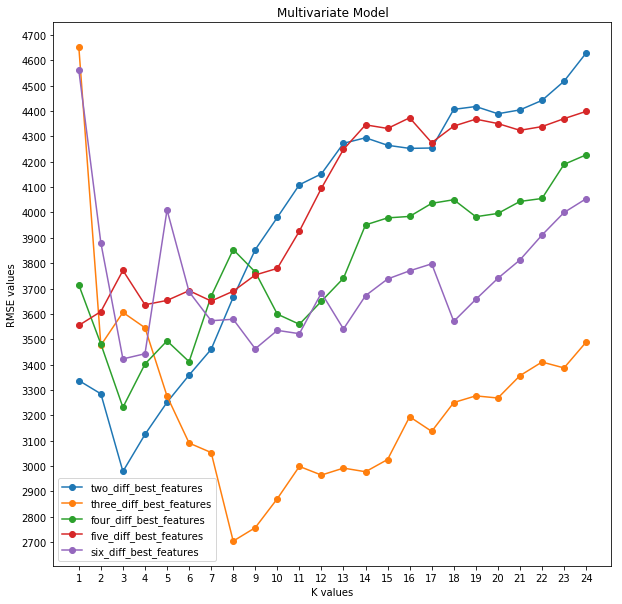

In [0]:
plt.figure(figsize=(10,10))
plt.title('Multivariate Model')
plt.xlabel('K values')
plt.ylabel('RMSE values')
plt.xticks(list(range(1, 25, 1)))
plt.yticks(list(range(2500, 5000, 100)))

for key, value in diff_best_features.items():

    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, marker='o')
    plt.legend(['two_diff_best_features','three_diff_best_features','four_diff_best_features','five_diff_best_features','six_diff_best_features'])

Each line in the plot corresponds to a feature. In comparison to all the other features, the 'three_diff_best_features' consisting of *'width', 'horsepower', 'curb-weight'* seems to be the best feature as it predominantly has lower RMSE values.

# 7 Ridge Regression

Ridge Regularization is designed to penalize model complexity, therefore the higher the alpha, the less complex the model, decreasing the error due to variance (overfit). Alphas that are too high on the other hand increase the error due to bias (underfit). It is important, therefore to choose an optimal alpha such that the error is minimized in both directions.

*   The train_test_split function is used to randomise the order of rows and split the data into training set (80%) and test set (20%) with the random seed as 1.
*   RidgeCV is used on the training set with 10 cross-validation to select the best alpha value from aphas = np.logspace(-10, 1, 10);








In [0]:
from sklearn.linear_model import RidgeCV

rr_train_cols = numeric_cars.columns.drop('price')
rr_X = numeric_cars[rr_train_cols]
rr_y = numeric_cars['price']

X_train, X_test, y_train, y_test = train_test_split(rr_X, rr_y, test_size=0.2, random_state=1)

optimal_value = RidgeCV(alphas=np.logspace(-10, 1, 10), cv=10).fit(X_train,y_train)
optimal_value.alpha_

0.0359381366380464

Train the ridge regression model with the optimal alpha value [0.0359381366380464] and provide the RMSE value on test set.

In [0]:
rr_rmse = RidgeCV(alphas=[0.0359381366380464], cv=10).fit(X_train,y_train)
rr_forecasts = rr_rmse.predict(X_test)
rr_results = np.sqrt(mean_squared_error(y_test, rr_forecasts))
rr_results

3285.5877340369807

# 8 Lasso Regression

Lasso (Least Absolute Shrinkage and Selection Operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

We will be using the dataset ***data*** for lasso regression.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [0]:
data = pd.read_csv("data.csv",index_col=0)
print(data.shape)
data.head()

(215, 101)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Label
1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
5,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


The dataset is split at half point to create training and test datasets.

In [0]:
train = data.iloc[:172,]
test = data.iloc[173:,]

X_train = train.drop(['Label'], axis=1)
y_train = train[['Label']]
X_test = test.drop(['Label'], axis=1)
y_test = test[['Label']]

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((172, 100), (172, 1), (42, 100), (42, 1))

A lasso model is first built with random_state=0, max_iter=10000,and tol=0.01. GridSearchCV with 3 cross-validation is then used with alphas = np.logspace(-3, -1, 30) to analyse $R^2$.

In [0]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

one_alphas =np.logspace(-3, -1, 30)
param_grid = [{'alpha':one_alphas}]
one_lasso = Lasso(max_iter=10000, tol=0.01,random_state=0).fit(X_train,y_train)
one_grid = GridSearchCV(one_lasso, param_grid, cv=3).fit(X_train,y_train)
one_scores = one_grid.cv_results_['mean_test_score']

A figure with the x-axis representing the different alphas and the y-axis representing CV score (mean test score) on training set is plotted.

 $R^2$ is seen to be decreasing which indicates that the predictor improves the model by less than expected chance.

Text(0, 0.5, 'CV Scores')

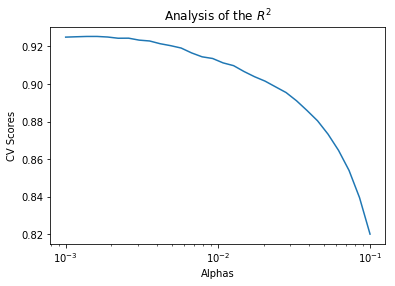

In [0]:
plt.semilogx(one_alphas, one_scores)
plt.title('Analysis of the $R^2$')
plt.xlabel('Alphas')
plt.ylabel('CV Scores')

Create another lasso model with random_state=0, max_iter=10000, alpha = 0.01 and find the coefficients.

In [0]:
two_lasso = Lasso(alpha=0.01, max_iter=10000, random_state=0).fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


A bar chart is drawn with the x-axis representing the no. of features [np.arange(0,100) represents (V1,V100)] and y-axis representing the value of the coefficient.

Text(0, 0.5, 'Coefficients')

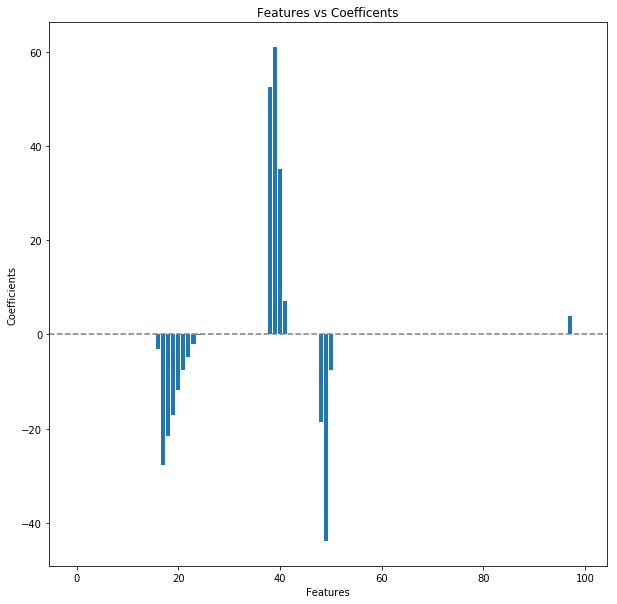

In [0]:
plt.figure(figsize=(10,10))
plt.bar(np.arange(0,100),two_lasso.coef_)
plt.axhline(0, color='grey', ls='--')
plt.title('Features vs Coefficents')
plt.xlabel('Features')
plt.ylabel('Coefficients')

From the bar chart, we can infer that there are approximately 16 features in this model out of the possible 100 attributes. We can also assume that the alpha is very small and the iterations are not enough for the model to provide high prediction accuracy.

Create another lasso with random_state=0 and max_iter=10000;
alphas = np.logspace(-3, -1, 30);


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

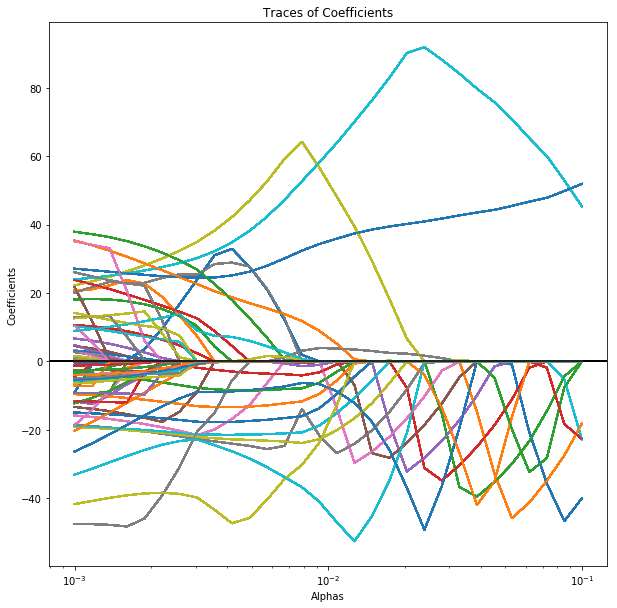

In [0]:
three_alphas = np.logspace(-3, -1, 30)
three_coef = pd.DataFrame(X_train, index=range(0,30))

for i,j in zip(three_alphas, range(0,30)):
    three_lasso = Lasso(alpha = i, max_iter=10000, random_state=0).fit(X_train,y_train)
    three_coef.iloc[j] = three_lasso.coef_

A figure with the x-axis representing the different alphas and y-axis representing coefficients is drawn.

In the plot, each line corresponds to a feature and all of the features converges to 0 suggesting no relationship, very small alpha value, less iterations and less prediction accuracy.